In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import random
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [43]:
def setSeed(x):
  random.seed(x)
  np.random.seed(x)
  torch.manual_seed(x)
  torch.cuda.manual_seed(x)
  torch.backends.cudnn.deterministic = True

setSeed(2)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # using gpu if available
device

device(type='cpu')

In [44]:
test = pd.read_csv("../input/pytorchfashionmnist/test.csv")
train = pd.read_csv("../input/pytorchfashionmnist/train.csv")
test

,ImageId,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,9997,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,9998,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


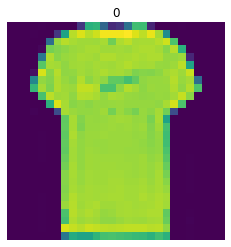

In [45]:
# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization
features_test_numpy = test.loc[:,test.columns != "ImageId"].values/255

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_numpy).float()
targetsTrain = torch.from_numpy(targets_numpy).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test_numpy).float()
fake_labels = np.zeros(features_test_numpy.shape)
fake_labels = torch.from_numpy(fake_labels)

# batch_size, epoch and iteration
batch_size = 100
n_iters = 50000
num_epochs = n_iters / (len(featuresTrain) / batch_size)
num_epochs = 2*int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, fake_labels)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [46]:
targets_numpy.shape
num_epochs

166

In [ ]:
import torch.nn.functional as F
for img,label in test_loader:
    print(img.shape,label.shape)
    print(label)
#     img = img.reshape(-1,28,28)
#     plt.imshow(img[0])
    break
# for i, (images, labels) in enumerate(train_loader):
#     print(images.shape,labels.shape)
#     break

In [59]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.conv1 = nn.Conv2d(1,8,2)
#         self.conv2 = nn.Conv2d(5,5,3)
#         self.conv2 = nn.Conv2d(10,5,3)
        self.fc1 = nn.Linear(1352,256)
        self.fc2 = nn.Linear(256,10)
#         self.fc3 = nn.Linear(64,10)
#         self.fc1 = nn.Linear(125, 10)
#         self.fc2 = nn.Linear(128,128)
#         self.fc3 = nn.Linear(128,10)
#         self.fc4 = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
#         print(x.shape)
        #x = x.reshape(-1,28,28)
        
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,(2,2))
#         x = F.relu(self.conv2(x))
#         x = F.max_pool2d(x,(2,2))
#         x = F.relu(self.conv2(x))
#         x = F.max_pool2d(x,(2,2))
        x = x.flatten(start_dim=1)
#         print(x.shape)
#         x = x.flatten(start_dim=1)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc2(x)
#         x = self.dropout(x)
#         x = self.relu(x)
#         x = self.fc3(x)
#         x = self.relu(x)
#         x = self.fc4(x)
        
        return x
    
# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.006)

In [56]:
for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(-1,28,28).unsqueeze(1))
#     print(train.shape)
    output = model(train)
    print(output.shape)
    break
        
        # Define variables
#         train = Variable(images.view(-1, 28*28)
#         print(train.shape)
# #         train.reshape(-1,28,28)
# #         train.unsqueeze(1)
#         op = model(train)
#         print(op)
#         break

torch.Size([100, 10])


In [57]:
num_epochs

166

In [58]:
from tqdm import tqdm
count = 0
loss_list = []
iteration_list = []
for epoch in tqdm(range(num_epochs)):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        #train = Variable(images.view(-1, 28*28))
        train = Variable(images.view(-1,28,28).unsqueeze(1))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]

        # Total number of labels
        total += len(labels)

        # Total correct predictions
        correct += (predicted == labels).sum()
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
    accuracy = 100 * correct / float(total)
    if count % 500 == 0:
        # Print Loss
        print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

  3%|▎         | 5/166 [00:38<20:32,  7.66s/it]

Iteration: 3000  Loss: 0.2853224277496338  Accuracy: 88.41500091552734%


  6%|▌         | 10/166 [01:16<20:04,  7.72s/it]

Iteration: 6000  Loss: 0.21795721352100372  Accuracy: 90.18499755859375%


  9%|▉         | 15/166 [01:55<19:19,  7.68s/it]

Iteration: 9000  Loss: 0.1692795306444168  Accuracy: 91.08000183105469%


 12%|█▏        | 20/166 [02:33<18:41,  7.68s/it]

Iteration: 12000  Loss: 0.36168134212493896  Accuracy: 91.74833679199219%


 15%|█▌        | 25/166 [03:12<18:02,  7.68s/it]

Iteration: 15000  Loss: 0.15527556836605072  Accuracy: 92.36499786376953%


 18%|█▊        | 30/166 [03:50<17:28,  7.71s/it]

Iteration: 18000  Loss: 0.16410942375659943  Accuracy: 92.95999908447266%


 21%|██        | 35/166 [04:30<17:05,  7.83s/it]

Iteration: 21000  Loss: 0.13682223856449127  Accuracy: 93.22166442871094%


 24%|██▍       | 40/166 [05:08<16:16,  7.75s/it]

Iteration: 24000  Loss: 0.13154977560043335  Accuracy: 93.4183349609375%


 27%|██▋       | 45/166 [05:47<15:49,  7.85s/it]

Iteration: 27000  Loss: 0.22164839506149292  Accuracy: 93.711669921875%


 30%|███       | 50/166 [06:27<15:11,  7.85s/it]

Iteration: 30000  Loss: 0.15334391593933105  Accuracy: 93.9816665649414%


 33%|███▎      | 55/166 [07:07<14:50,  8.02s/it]

Iteration: 33000  Loss: 0.1540663093328476  Accuracy: 94.1050033569336%


 36%|███▌      | 60/166 [07:46<14:09,  8.02s/it]

Iteration: 36000  Loss: 0.19920821487903595  Accuracy: 94.2699966430664%


 39%|███▉      | 65/166 [08:27<13:46,  8.19s/it]

Iteration: 39000  Loss: 0.11507105827331543  Accuracy: 94.52166748046875%


 42%|████▏     | 70/166 [09:08<13:03,  8.16s/it]

Iteration: 42000  Loss: 0.09774309396743774  Accuracy: 94.50499725341797%


 45%|████▌     | 75/166 [09:50<12:47,  8.43s/it]

Iteration: 45000  Loss: 0.08288001269102097  Accuracy: 94.46499633789062%


 48%|████▊     | 80/166 [10:33<12:19,  8.60s/it]

Iteration: 48000  Loss: 0.14703607559204102  Accuracy: 94.6050033569336%


 51%|█████     | 85/166 [11:17<11:43,  8.68s/it]

Iteration: 51000  Loss: 0.12526722252368927  Accuracy: 94.8566665649414%


 54%|█████▍    | 90/166 [12:02<11:23,  8.99s/it]

Iteration: 54000  Loss: 0.15243759751319885  Accuracy: 94.86833190917969%


 57%|█████▋    | 95/166 [12:46<10:37,  8.98s/it]

Iteration: 57000  Loss: 0.11647671461105347  Accuracy: 94.90166473388672%


 60%|██████    | 100/166 [13:32<10:03,  9.15s/it]

Iteration: 60000  Loss: 0.16960150003433228  Accuracy: 95.04666900634766%


 63%|██████▎   | 105/166 [14:20<09:42,  9.55s/it]

Iteration: 63000  Loss: 0.18411526083946228  Accuracy: 95.06500244140625%


 66%|██████▋   | 110/166 [15:09<09:11,  9.84s/it]

Iteration: 66000  Loss: 0.15055544674396515  Accuracy: 95.25833129882812%


 69%|██████▉   | 115/166 [16:00<08:37, 10.14s/it]

Iteration: 69000  Loss: 0.101417675614357  Accuracy: 95.39167022705078%


 72%|███████▏  | 120/166 [16:53<08:02, 10.50s/it]

Iteration: 72000  Loss: 0.09181002527475357  Accuracy: 95.35333251953125%


 75%|███████▌  | 125/166 [17:45<07:06, 10.41s/it]

Iteration: 75000  Loss: 0.20483598113059998  Accuracy: 95.48666381835938%


 78%|███████▊  | 130/166 [18:38<06:18, 10.53s/it]

Iteration: 78000  Loss: 0.10712835192680359  Accuracy: 95.46833038330078%


 81%|████████▏ | 135/166 [19:30<05:24, 10.47s/it]

Iteration: 81000  Loss: 0.19161991775035858  Accuracy: 95.59166717529297%


 84%|████████▍ | 140/166 [20:23<04:33, 10.52s/it]

Iteration: 84000  Loss: 0.08248139172792435  Accuracy: 95.45166778564453%


 87%|████████▋ | 145/166 [21:16<03:44, 10.70s/it]

Iteration: 87000  Loss: 0.09075528383255005  Accuracy: 95.54499816894531%


 90%|█████████ | 150/166 [22:11<02:53, 10.82s/it]

Iteration: 90000  Loss: 0.2020287662744522  Accuracy: 95.57333374023438%


 93%|█████████▎| 155/166 [23:04<01:57, 10.67s/it]

Iteration: 93000  Loss: 0.10543888807296753  Accuracy: 95.73500061035156%


 96%|█████████▋| 160/166 [23:57<01:03, 10.60s/it]

Iteration: 96000  Loss: 0.15992555022239685  Accuracy: 95.47666931152344%


 99%|█████████▉| 165/166 [24:50<00:10, 10.64s/it]

Iteration: 99000  Loss: 0.12566058337688446  Accuracy: 95.7683334350586%


100%|██████████| 166/166 [25:01<00:00,  9.04s/it]


In [64]:
# Making it submission ready
submission = [['ImageId', 'label']]

# Turn off gradients for validation
with torch.no_grad():
    model.eval()
    image_id = 0
    
    for images, labels in test_loader:
        #test = Variable(images.view(-1, 28*28))
        test = Variable(images.view(-1,28,28).unsqueeze(1))
        outputs = model(test)
        predictions = torch.max(outputs.data, 1)[1]
        
        for prediction in predictions:
            submission.append([image_id, prediction.item()])
            image_id += 1

In [65]:
submission_df = pd.DataFrame(submission)
submission_df.columns = submission_df.iloc[0]
submission_df = submission_df.drop(0, axis=0)
submission_df.head

<bound method NDFrame.head of 0     ImageId label
1           0     5
2           1     5
3           2     5
4           3     5
5           4     5
...       ...   ...
9996     9995     5
9997     9996     5
9998     9997     8
9999     9998     5
10000    9999     5

[10000 rows x 2 columns]>

In [66]:
submission_df.to_csv("submission.csv", index=False)

In [67]:
submission_df.head()

,ImageId,label
1,0,5
2,1,5
3,2,5
4,3,5
5,4,5
